In [1]:
import pandas as pd
df=pd.read_csv("data/encoded_flight_price.csv",index_col=0)
df.head()

,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0.0,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2.0,7662,1,5,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,1140,2.0,13882,9,6,9,25,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,325,1.0,6218,12,5,18,5,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,285,1.0,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1


In [2]:
df.tail()

,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10678,150,0.0,4107,9,4,19,55,22,25,0,...,0,0,0,1,0,0,0,0,0,0
10679,155,0.0,4145,27,4,20,45,23,20,1,...,0,0,0,1,0,0,0,0,0,0
10680,180,0.0,7229,27,4,8,20,11,20,0,...,0,0,0,0,0,0,1,0,0,0
10681,160,0.0,12648,1,3,11,30,14,10,0,...,0,0,0,0,0,0,0,0,0,1
10682,500,2.0,11753,9,5,10,55,19,15,1,...,0,0,1,0,0,1,0,0,0,0


In [3]:
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour',
       'Arrival_Minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [4]:
df.isnull().sum()

Duration                                     0
Total_Stops                                  0
Price                                        0
Day_of_Journey                               0
Month_of_Journey                             0
Dep_Hour                                     0
Dep_Minute                                   0
Arrival_Hour                                 0
Arrival_Minute                               0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi 

In [5]:
df.dtypes

Duration                                       int64
Total_Stops                                  float64
Price                                          int64
Day_of_Journey                                 int64
Month_of_Journey                               int64
Dep_Hour                                       int64
Dep_Minute                                     int64
Arrival_Hour                                   int64
Arrival_Minute                                 int64
Airline_Air India                              int64
Airline_GoAir                                  int64
Airline_IndiGo                                 int64
Airline_Jet Airways                            int64
Airline_Jet Airways Business                   int64
Airline_Multiple carriers                      int64
Airline_Multiple carriers Premium economy      int64
Airline_SpiceJet                               int64
Airline_Trujet                                 int64
Airline_Vistara                               

In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from mlflow.models.signature import infer_signature
from mlflow.models.signature import infer_signature

In [7]:
# Splitting the dataset into features and target
X = df.drop('Price', axis=1)
y = df['Price']

In [8]:
print(X.shape)
print(X.columns)

(10683, 28)
Index(['Duration', 'Total_Stops', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')


In [9]:
print(y.shape)

(10683,)


In [10]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Convert integer columns to float64 to avoid issues with missing values
X_train = X_train.astype({col: 'float64' for col in X_train.select_dtypes('int').columns})
X_test = X_test.astype({col: 'float64' for col in X_test.select_dtypes('int').columns})


In [12]:
mlflow.set_experiment('Flight Price Prediction')

<Experiment: artifact_location='file:///Users/priyankamalavade/Desktop/mlflow_miniproject/mlruns/790893573983678838', creation_time=1738998687311, experiment_id='790893573983678838', last_update_time=1738998687311, lifecycle_stage='active', name='Flight Price Prediction', tags={}>

In [13]:
# Function to log residual plots with two colors for positive and negative residuals
def log_residual_plot(model_name, y_test, y_pred):
    plt.figure(figsize=(10, 6))
    
    # Calculate residuals
    residuals = y_test - y_pred
    
    # Plot all residuals in green and red for positive and negative residuals
    plt.scatter(y_pred[residuals >= 0], residuals[residuals >= 0], color='g', label='Positive Residuals')
    plt.scatter(y_pred[residuals < 0], residuals[residuals < 0], color='r', label='Negative Residuals')
    
    # Add plot title and labels
    plt.title(f'Residual Plot for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    
    # Save and log the plot as an artifact in MLflow
    plt.legend()
    plt.savefig(f'{model_name}_residuals.png')
    mlflow.log_artifact(f'{model_name}_residuals.png')



In [14]:
# Function to log models and metrics in MLflow
def log_model_in_mlflow(model_name, model, X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name=model_name):
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred = model.predict(X_test)
        
        # Calculate performance metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Log parameters, metrics, and model in MLflow
        mlflow.log_param("model_type", model_name)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)

        # Log the model signature
        signature = infer_signature(X_train, y_pred)
        mlflow.sklearn.log_model(model, model_name, signature=signature)
        
        # Log residual plot as an artifact
        log_residual_plot(model_name, y_test, y_pred)

        # Print the performance metrics
        print(f"{model_name} - RMSE: {rmse}, R2: {r2}")


In [15]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Lasso Regressor': Lasso(alpha=0.1, random_state=42),  # Lasso added as a regularization method
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}


Linear Regression - RMSE: 2854.382405416484, R2: 0.6150296737900629
Decision Tree Regressor - RMSE: 2304.668892633256, R2: 0.7490310327139331
Random Forest Regressor - RMSE: 2019.4976033907099, R2: 0.8072964887880146
Lasso Regressor - RMSE: 2854.457822308415, R2: 0.6150093305809793
Gradient Boosting Regressor - RMSE: 2174.481344029544, R2: 0.7765839775450069


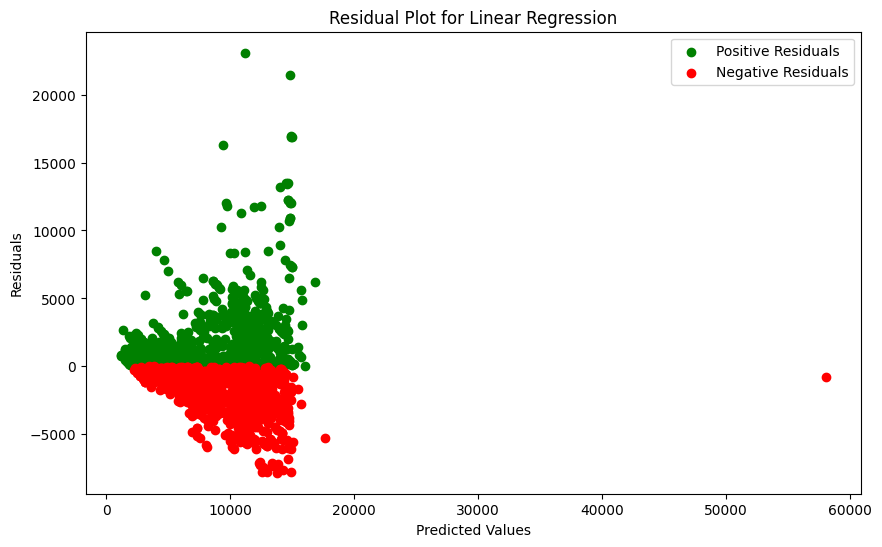

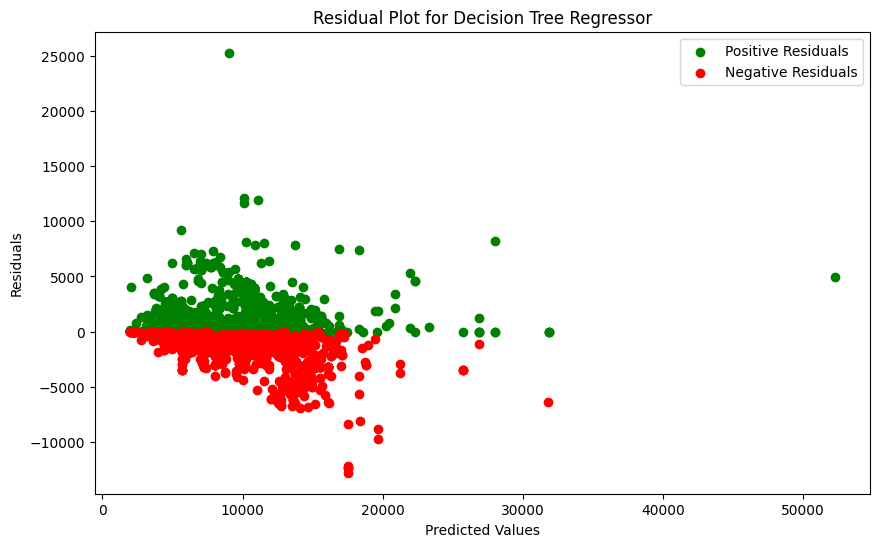

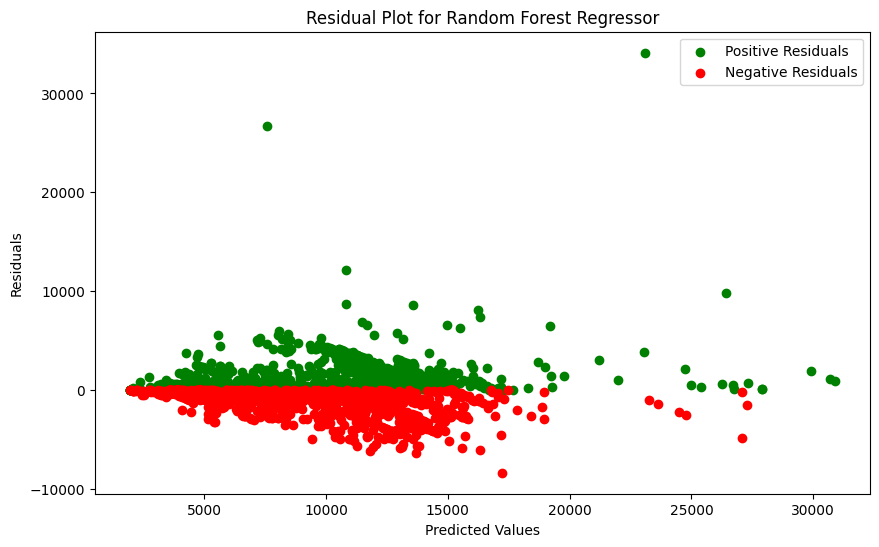

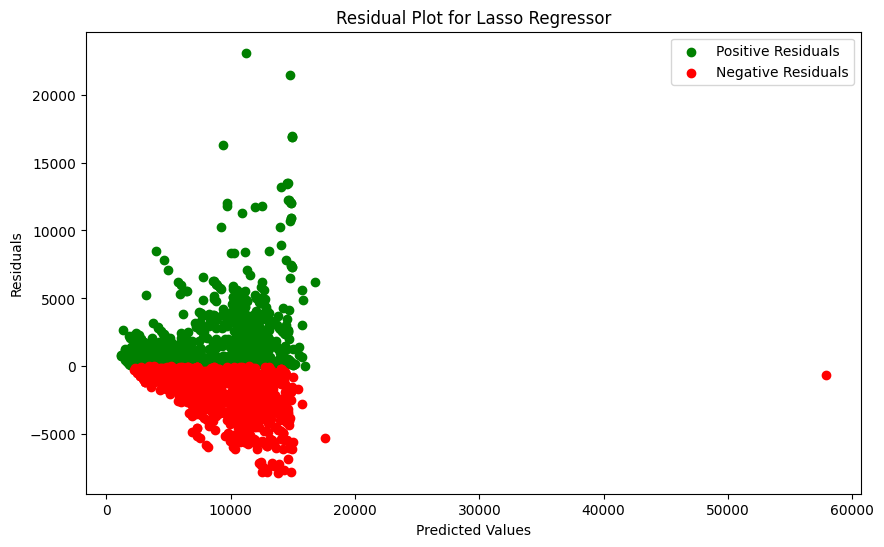

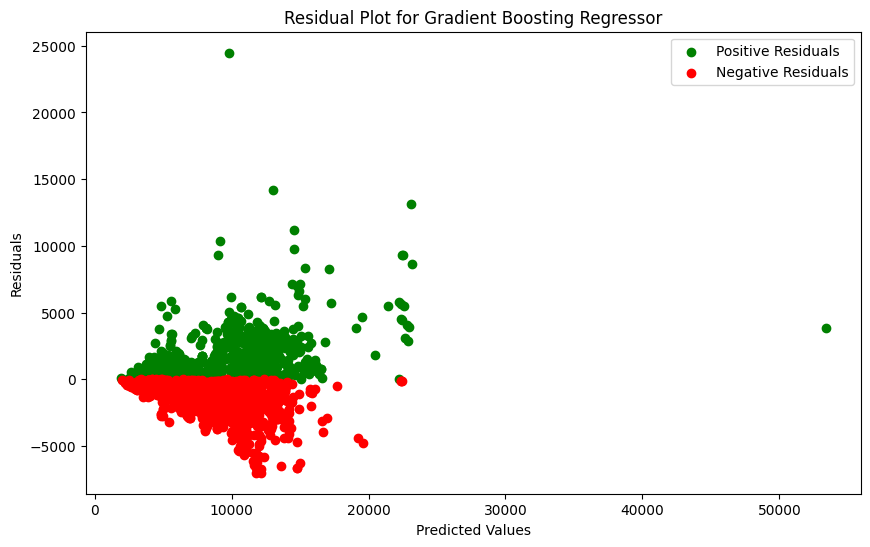

In [16]:
# Train and log models
for model_name, model in models.items():
    log_model_in_mlflow(model_name, model, X_train, X_test, y_train, y_test)

## Hyperparameter Tuning For Random Forest and Gradient Boosting


In [17]:
def log_residual_plot(model_name, y_test, y_pred):
    plt.figure(figsize=(10, 6))
    residuals = y_test - y_pred
    sns.residplot(x=y_pred, y=residuals, color="g")  # Removed lowess=True
    plt.title(f'Residual Plot for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.savefig(f'{model_name}_residuals.png')
    mlflow.log_artifact(f'{model_name}_residuals.png')  # Log residual plot as artifact


In [18]:
from sklearn.model_selection import GridSearchCV
def log_model_in_mlflow(model_name, model, X_train, X_test, y_train, y_test, param_grid=None):
    with mlflow.start_run(run_name=model_name):
        # Check if hyperparameter tuning is required
        if param_grid:
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
            grid_search.fit(X_train, y_train)
            model = grid_search.best_estimator_  # Use the best model found by GridSearch
            mlflow.log_params(grid_search.best_params_)  # Log best hyperparameters
        
        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate performance metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Log metrics
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)

        # Log model
        mlflow.sklearn.log_model(model, model_name)
        
        # Log residual plot
        log_residual_plot(model_name, y_test, y_pred)
        
        # Print performance
        print(f"{model_name} - RMSE: {rmse}, R2: {r2}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.3s
[CV] END max_depth=10, min_sa

2025/02/08 13:23:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest Regressor Tuning - RMSE: 1926.5508048689771, R2: 0.8246265376736809
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.4s
[CV] END l

2025/02/08 13:31:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Gradient Boosting Regressor Tuning - RMSE: 1809.1286235866685, R2: 0.8453528810209848


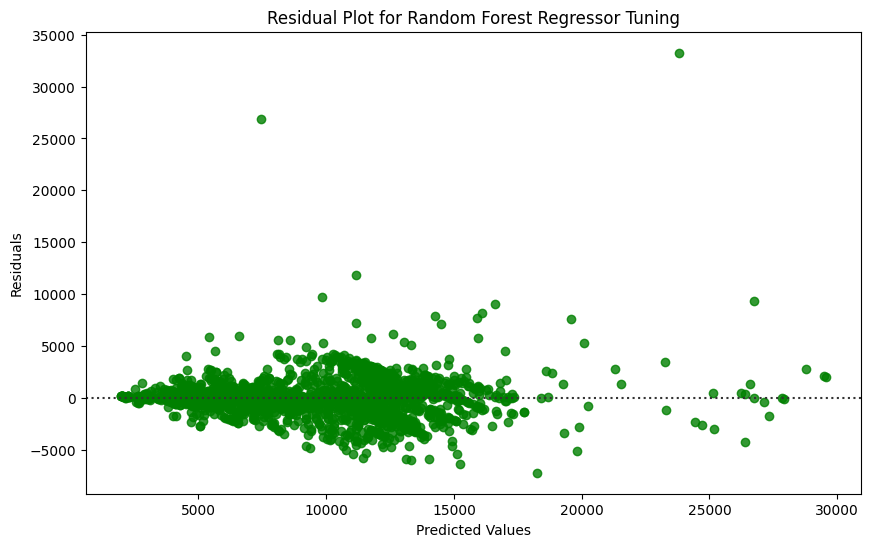

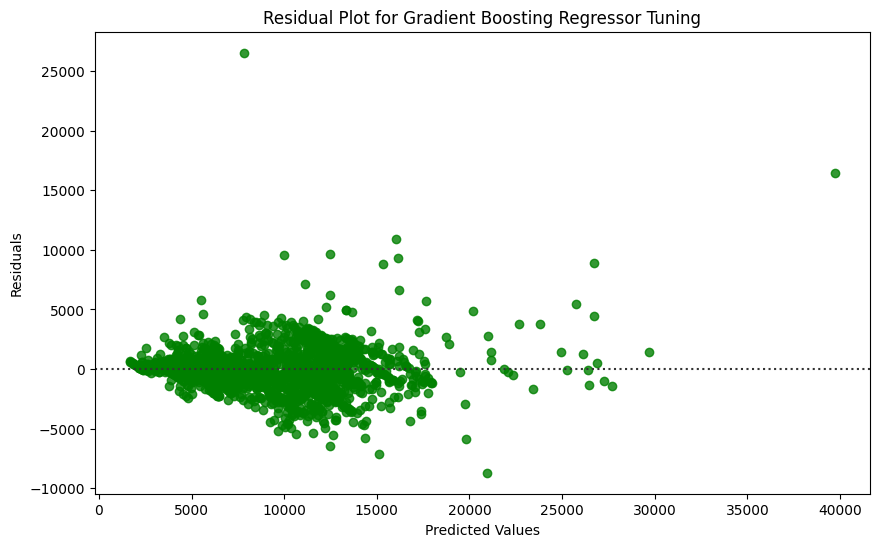

In [19]:
# Parameter grids for tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

# Train and log Random Forest
log_model_in_mlflow("Random Forest Regressor Tuning", RandomForestRegressor(random_state=42), X_train, X_test, y_train, y_test, param_grid_rf)

# Train and log Gradient Boosting
log_model_in_mlflow("Gradient Boosting Regressor Tuning", GradientBoostingRegressor(random_state=42), X_train, X_test, y_train, y_test, param_grid_gb)
